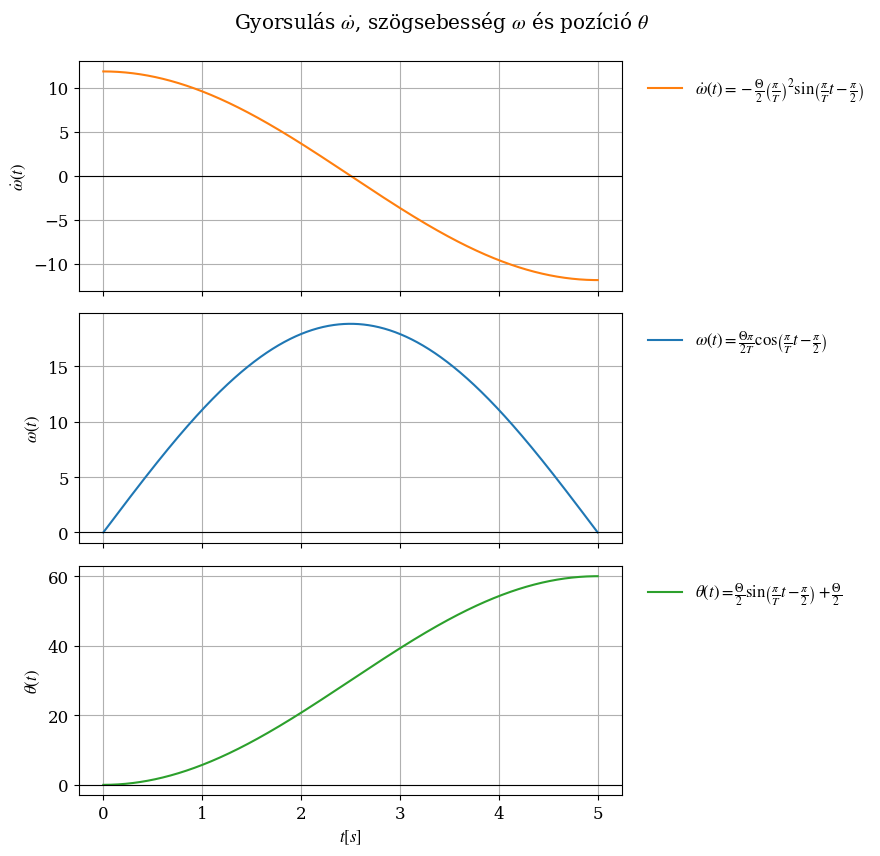

In [23]:
# Example: save as plot_theta.py and run `python plot_theta.py`
import numpy as np
import matplotlib.pyplot as plt

# Use LaTeX-style math fonts (mathtext) and serif family
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "stix",
    "font.size": 12
})

def theta_t(t, Theta, T):
    return (Theta / 2.0) * np.sin((np.pi / T) * t - np.pi / 2.0) + (Theta / 2.0)

# Parameters (change as needed)
Theta = 60.0   # amplitude / max value
T = 5.0        # period parameter

# Time array
t = np.linspace(0, T, 1000)
theta = theta_t(t, Theta, T)

# Analytical derivatives
omega = (Theta * np.pi) / (2.0 * T) * np.cos((np.pi / T) * t - np.pi / 2.0)                 # d(theta)/dt
omega_dot = - (Theta / 2.0) * (np.pi / T)**2 * np.sin((np.pi / T) * t - np.pi / 2.0)       # d^2(theta)/dt^2

# Create 3 vertical subplots: top=omega, middle=omega_dot, bottom=theta
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(9, 9))
ax_omega_dot, ax_omega, ax_theta = axs

ax_omega_dot.plot(t, omega_dot, color='C1', label=r'$\dot{\omega}(t)=-\frac{\Theta}{2}\left(\frac{\pi}{T}\right)^2\sin\!\left(\frac{\pi}{T}t-\frac{\pi}{2}\right)$')
ax_omega_dot.set_ylabel(r'$\dot{\omega}(t)$')
ax_omega_dot.legend(loc='upper right', frameon=False)
ax_omega_dot.grid(True)

ax_omega.plot(t, omega, color='C0', label=r'$\omega(t)=\frac{\Theta\pi}{2T}\cos\!\left(\frac{\pi}{T}t-\frac{\pi}{2}\right)$')
ax_omega.set_ylabel(r'$\omega(t)$')
ax_omega.legend(loc='upper right', frameon=False)
ax_omega.grid(True)

ax_theta.plot(t, theta, color='C2', label=r'$\theta(t)=\frac{\Theta}{2}\sin\!\left(\frac{\pi}{T}t-\frac{\pi}{2}\right)+\frac{\Theta}{2}$')
ax_theta.set_xlabel(r'$t [s]$')
ax_theta.set_ylabel(r'$\theta(t)$')
ax_theta.legend(loc='upper right', frameon=False)
ax_theta.grid(True)

# make the zereo lines thicker
for ax in axs:
    ax.axhline(0, color='black', linewidth=0.8)

#put the legends outside the plots
ax_omega_dot.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)
ax_omega.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)
ax_theta.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=False)

fig.suptitle(f"Gyorsulás {r'$\dot{\omega}$'}, szögsebesség {r'$\omega$'} és pozíció {r'$\theta$'}", y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()